In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
#df=pd.read_excel('restaurants.xlsx')

In [2]:
#df = pd.read_excel('restaurant_info_6Districts_Ju.xlsx')
df = pd.read_excel('FinalProject/REST_Analysis_JAPANESE.xlsx')

In [34]:
pd.set_option('display.max_columns',40,'display.max_rows',40)

In [4]:
#fit notebook cell to browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [9]:
df[df['food_type'].str.contains("eligible transactions")].index

Int64Index([   5,    8,   10,   30,  111,  116,  143,  165,  167,  201,  228,
             252,  264,  267,  281,  293,  311,  329,  341,  347,  389,  430,
             447,  454,  498,  507,  508,  533,  612,  614,  648,  653,  658,
             672,  676,  686,  729,  739,  769,  777,  780,  805,  845,  848,
             853,  863,  867,  873,  875,  881,  910,  935,  967, 1099, 1121,
            1138, 1180, 1219, 1274, 1289],
           dtype='int64')

<h1>DATA CLEAN

In [10]:
#remove titles
#offender_index = df[df['happy']=="happy"].index
#df= df.drop(offender_index)

#remove asia miles
asia_miles_index = df[df['food_type'].str.contains("eligible transactions")].index
df= df.drop(asia_miles_index)
df = df.reset_index()
df = df.drop('index',axis=1)

In [12]:
#drop duplicate entries with same name and location
df.drop_duplicates(subset=['name', 'location'], keep='last',inplace = True)

In [13]:
#change columns to float type
df['happy'] = df['happy'].astype(float)
df['sad'] = df['sad'].astype(float)
df['bookmark'] = df['bookmark'].astype(float)

In [14]:
#enable sort by price
df['price'] = pd.Categorical(df['price'], ['Below $50','$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])

In [15]:
#insert additional column of pure numeric prices
df['price_int'] = df['price'].replace({"Below $50":25,"$51-100":75,"$101-200":150,"$201-400":300,"$401-800":600,"Above $801":1000})


In [16]:
#define which food type to search
restaurant_type = ['Japanese','Western','Hong Kong Style','Guangdong','International','Taiwan','Korean','Thai','Italian','Sichuan']
restaurant_type_regex = "Japanese|Western|Hong Kong Style|Guangdong|International|Taiwan|Korean|Thai|Italian|Sichuan"

In [17]:
#define locations
Places = ['Causeway Bay','Central',"Yuen Long","Tsuen Wan","Tsim Sha Tsui","Mong Kok"]

In [18]:
#filter out restaurants who are in the majority
df = df[df['food_type'].str.contains(restaurant_type_regex)]
df.reset_index(inplace = True)
df = df.drop('index',axis=1)

In [19]:
#give food type a number
food_model = OrdinalEncoder()
test = pd.DataFrame(food_model.fit_transform(df[['food_type']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"food_int"})
df.shape

(1186, 19)

In [20]:
#give location type a number
location_model = OrdinalEncoder()
test = pd.DataFrame(location_model.fit_transform(df[['location']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"location_int"})
df.shape

(1186, 20)

In [21]:
#introduce happy vs sad column
df['happy_vs_sad'] = df['happy']/df['sad']
df['happy_vs_sad'] = np.where(df['happy_vs_sad'] == np.inf, df['happy'], df['happy_vs_sad'])


In [22]:
#df only has Japanese food left
df = df[df['food_type']=="Japanese"]

In [23]:
df['num_payment'] = df['pay_list'].str.count(',')+1
df['num_facility'] = df['other_facility'].str.count(',')+1

In [24]:
df['payment_methods'] = df['pay_list'].str.split(',')
df.reset_index(inplace=True, drop = True)

In [25]:
df.describe()

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0,330.000000,330.000000,324.000000,301.000000
mean,12537.460606,222.024242,12.463636,2.424242,33.251515,3.742424,3.663636,3.630303,3.733333,3.345455,18.115152,272.500000,4.0,2.369697,40.830435,5.725309,5.375415
std,11268.156893,198.002301,18.449970,4.168417,57.056580,0.437963,0.479563,0.489702,0.442888,0.507147,1.769055,255.314708,0.0,1.731960,51.660722,2.621979,2.908939
min,384.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,13.000000,25.000000,4.0,0.000000,1.823529,1.000000,1.000000
25%,4644.250000,76.000000,3.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,17.000000,150.000000,4.0,1.000000,11.653846,4.000000,3.000000
50%,10117.000000,149.500000,6.000000,1.000000,0.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,150.000000,4.0,2.000000,23.780303,6.000000,5.000000
75%,16127.250000,312.250000,14.750000,2.000000,50.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,300.000000,4.0,4.000000,44.272727,7.000000,8.000000
max,86010.000000,1065.000000,123.000000,64.000000,360.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,1000.000000,4.0,5.000000,425.000000,12.000000,14.000000


In [26]:
#categorically split payment methods
one_hot = pd.get_dummies(df['payment_methods'].apply(pd.Series).stack()).sum(level=0)
df = df.merge(one_hot,how='outer',left_index = True, right_index=True)

In [27]:
#ignore all payment methods who are not in more than 50% of restaurants
arr_keep = ['name','price','food_type','location']
for i,j in list((df.describe().iloc[1]>0.5).items()):
    if j:
        arr_keep.append(i)
df = df[arr_keep]

In [28]:
def district(x):
    if x == "Causeway Bay" or x == "Central":
        return "HK"
    if x == "Yuen Long" or x == "Tsuen Wan":
        return "NT"
    else:
        return "KL"
    
df['location'] = df['location'].apply(lambda x: district(x))

In [47]:
display(df[df['location']=="HK"].describe())
display(df[df['location']=="KL"].describe())
display(df[df['location']=="NT"].describe())

,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility,Alipay,AlipayHK,Cash,Master,UnionPay,Visa
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,111.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,14415.188034,228.598291,9.931624,1.777778,36.487179,3.863248,3.743590,3.692308,3.863248,3.264957,18.427350,365.384615,4.0,0.384615,44.033857,6.076923,5.855856,0.589744,0.606838,0.982906,0.888889,0.683761,0.888889
std,8701.468334,209.282974,12.378183,1.445034,47.541020,0.345063,0.438529,0.463524,0.345063,0.480538,1.521774,307.693137,0.0,0.488597,54.008707,2.385856,2.938295,0.493996,0.490553,0.130179,0.315621,0.467008,0.315621
min,2129.000000,24.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,14.000000,25.000000,4.0,0.000000,3.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8977.000000,76.000000,3.000000,1.000000,0.000000,4.000000,3.000000,3.000000,4.000000,3.000000,17.000000,150.000000,4.0,0.000000,14.200000,5.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,11815.000000,141.000000,5.000000,1.000000,24.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,300.000000,4.0,0.000000,26.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,18321.000000,328.000000,13.000000,2.000000,50.000000,4.000000,4.000000,4.000000,4.000000,4.000000,19.000000,600.000000,4.0,1.000000,50.500000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,45755.000000,1065.000000,58.000000,9.000000,280.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,1000.000000,4.0,1.000000,348.000000,12.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility,Alipay,AlipayHK,Cash,Master,UnionPay,Visa
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.0,111.000000,111.000000,110.000000,103.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000
mean,17119.288288,300.567568,18.873874,2.090090,45.594595,3.747748,3.666667,3.666667,3.693694,3.387387,18.162162,238.963964,4.0,2.549550,43.854300,6.218182,5.844660,0.654545,0.636364,1.0,0.845455,0.672727,0.836364
std,14130.542042,204.929949,25.606149,2.011555,77.712451,0.436275,0.473542,0.473542,0.463049,0.525204,1.781422,172.669044,0.0,0.499795,56.638370,2.717196,2.851753,0.477693,0.483247,0.0,0.363125,0.471365,0.371638
min,2028.000000,57.000000,0.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,2.000000,14.000000,25.000000,4.0,2.000000,3.098765,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,7713.500000,138.000000,4.000000,1.000000,0.000000,3.500000,3.000000,3.000000,3.000000,3.000000,17.000000,150.000000,4.0,2.000000,11.745902,4.250000,4.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000
50%,12664.000000,219.000000,9.000000,1.000000,18.000000,4.000000,4.000000,4.000000,4.000000,3.000000,19.000000,150.000000,4.0,3.000000,23.900000,6.000000,6.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
75%,20940.000000,457.500000,23.000000,2.000000,54.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,300.000000,4.0,3.000000,45.113636,8.000000,8.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
max,86010.000000,895.000000,123.000000,11.000000,360.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,1000.000000,4.0,3.000000,425.000000,12.000000,13.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility,Alipay,AlipayHK,Cash,Master,UnionPay,Visa
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0,102.000000,102.000000,97.000000,87.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000
mean,5397.490196,129.009804,8.392157,3.529412,16.107843,3.598039,3.568627,3.519608,3.627451,3.392157,17.705882,202.450980,4.0,4.450980,33.865244,4.742268,4.206897,0.618557,0.628866,1.0,0.618557,0.391753,0.639175
std,5525.806746,126.874265,12.224109,6.924924,30.900321,0.492715,0.517224,0.521430,0.485871,0.510423,1.947775,234.402279,0.0,0.500049,42.174375,2.542466,2.624296,0.488264,0.485618,0.0,0.488264,0.490678,0.482735
min,384.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,3.000000,2.000000,13.000000,25.000000,4.0,4.000000,1.823529,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1946.000000,47.750000,2.000000,1.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,16.000000,75.000000,4.0,4.000000,8.409375,3.000000,2.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
50%,3497.500000,76.500000,5.000000,2.000000,0.000000,4.000000,4.000000,4.000000,4.000000,3.000000,18.000000,150.000000,4.0,4.000000,17.500000,5.000000,4.000000,1.000000,1.000000,1.0,1.000000,0.000000,1.000000
75%,6987.500000,161.000000,11.000000,3.000000,23.500000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,150.000000,4.0,5.000000,41.979167,6.000000,6.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
max,30518.000000,656.000000,72.000000,64.000000,150.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,1000.000000,4.0,5.000000,282.000000,10.000000,9.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [59]:
df = df[df['location'] == "HK"]

<h1>USEFUL VISUALIZATION TOOLS

In [60]:
df

,name,price,food_type,location,bookmark,happy,sad,num_branch,num_seat,taste,decor,service,hygiene,value,overall,price_int,food_int,location_int,happy_vs_sad,num_payment,num_facility,Alipay,AlipayHK,Cash,Master,UnionPay,Visa
50,Tsukiji Japanese Restaurant (Island Beverley) ...,$101-200,Japanese,HK,14187.0,642.0,18.0,2.0,54.0,4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,0.0,35.666667,7.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0
51,Toretore Hamayaki 漁獲浜燒,$201-400,Japanese,HK,36733.0,888.0,8.0,1.0,36.0,4.0,4.0,4.0,4.0,3.0,19.0,300,4.0,0.0,111.000000,7.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0
52,Isono Suisan 磯野水產,$201-400,Japanese,HK,18591.0,651.0,5.0,1.0,49.0,4.0,4.0,4.0,4.0,4.0,20.0,300,4.0,0.0,130.200000,7.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0
53,Xuan Sushi 玄鮨,Above $801,Japanese,HK,11385.0,553.0,4.0,1.0,50.0,4.0,4.0,4.0,4.0,4.0,20.0,1000,4.0,0.0,138.250000,6.0,4.0,0.0,1.0,0.0,1.0,1.0,1.0
54,Kokon 古今,$201-400,Japanese,HK,15447.0,440.0,5.0,3.0,40.0,4.0,4.0,4.0,4.0,4.0,20.0,300,4.0,0.0,88.000000,6.0,10.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Uma Nota,$201-400,Japanese,HK,11142.0,37.0,2.0,1.0,60.0,4.0,4.0,4.0,4.0,3.0,19.0,300,4.0,1.0,18.500000,5.0,8.0,0.0,0.0,1.0,1.0,1.0,1.0
163,Sukiyaki Mori Kyuu (Peel Street) すき焼 森久 (卑利街),$401-800,Japanese,HK,8622.0,33.0,2.0,3.0,0.0,4.0,4.0,4.0,4.0,3.0,19.0,600,4.0,1.0,16.500000,6.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
164,YAKINIKU GREAT SOHO,Above $801,Japanese,HK,7819.0,35.0,0.0,2.0,0.0,4.0,4.0,4.0,4.0,4.0,20.0,1000,4.0,1.0,35.000000,6.0,7.0,1.0,1.0,1.0,1.0,0.0,1.0
165,Sushi Kumo (Tak Woo House) 雲壽司 (德和大廈),$101-200,Japanese,HK,2930.0,141.0,0.0,2.0,18.0,4.0,4.0,4.0,4.0,4.0,20.0,150,4.0,1.0,141.000000,9.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [61]:
def bar_chart(column,x_axis = "variables",title = "graph of X",y_axis = "number of X"): #draws bar chart, input one array
    x = column.value_counts(sort=False).index
    y = column.value_counts(sort=False)

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(x, y, color ='orange',
            width = 0.4)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

In [50]:
def scatter_graph(x,y,title): #draws a scatter graph, input two arrays
    m, b = np.polyfit(x, y, 1)
    print("y intercept: ", b, "slope: ",m)
    plt.scatter(x, y, alpha=0.7)
    try:
        plt.plot(x, m*x + b)
    except:
        None
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    

In [51]:
def find_average(df): #returns sad, happy, bookmark, price_int
    print("Average sad is: ",df['sad'].mean())
    print("Average happy is: ",df['happy'].mean())
    print("Average bookmark is: ",df['bookmark'].mean())
    print("Average price is: ",df['price_int'].mean())
    print("------------------ \n")
    return df['sad'].mean(),df['happy'].mean(),df['bookmark'].mean(),df['price_int'].mean()

In [52]:
def scatter_matrix(df,columns = ['price','bookmark','happy','sad','happy_vs_sad'], dot_size = 30, fig_size = (20,20)):
    visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', s=dot_size,  figsize=fig_size)

In [53]:
def color_scatter_matrix(df,food_or_loc,  columns = ['location_int','price_int','bookmark','happy','sad'], dot_size = 30, fig_size = (20,20)):
     
    if food_or_loc == 'food':
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['food_int'] , s=dot_size,  figsize=fig_size)
        
    
    else: 
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['location_int'] , s=dot_size,  figsize=fig_size)


In [54]:
def legend(food_loc): #finds legend for color_scatter_matrix

    if food_loc == 'food':
        base_tags = pd.DataFrame(list(range(df['food_int'].nunique())))
        plt.imshow([np.unique(df['food_int'])])
        plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
    else:
        base_tags = pd.DataFrame(list(range(df['location_int'].nunique())))
        plt.imshow([np.unique(df['location_int'])])
        plt.xticks(ticks=np.unique(df['location_int']),labels=location_model.inverse_transform(base_tags))

In [55]:
def density_graph(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="kde")
    plt.show()
    
def scatter_bar(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="reg")
    plt.show()

In [56]:
def pair_plot(df,variable):
    sns.pairplot(df, hue=variable, height=1.8)
    
    plt.show()

In [ ]:
Places

In [ ]:
df[df['num_seat']==0]

<h1> Conduct Analysis

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")


sns.pairplot(df, hue="location")


In [ ]:
g = sns.jointplot(
    data=df,
    x="num_seat", y="overall", hue="price_int",
    kind="kde",
)

<AxesSubplot:xlabel='price_int', ylabel='overall'>

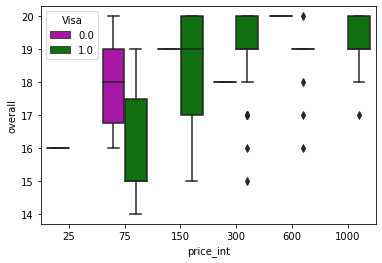

In [62]:
sns.boxplot(x="price_int", y="overall",
            hue="Visa", palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='location', ylabel='overall'>

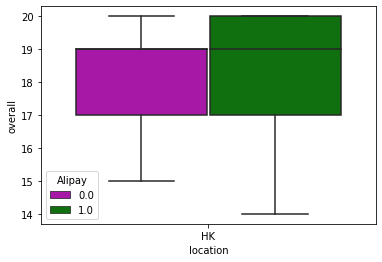

In [63]:
sns.boxplot(x="location", y="overall",
            hue="Alipay", palette=["m", "g"],
            data=df)

<AxesSubplot:xlabel='location', ylabel='overall'>

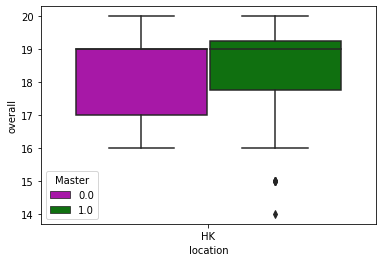

In [64]:
#for i in ['taste', 'decor', 'service',  'hygiene', 'value','overall']: #num_facility

sns.boxplot(x="location", y="overall",
            hue="Master", palette=["m", "g"],
            data=df)

In [ ]:
density_graph("num_seat","overall",df)

In [ ]:
for i in Places:
    print(i)
    density_graph("happy","overall",df[df['location']==i])
#df[df['location']=="Central"].sort_values(by='happy', ascending = False)

In [ ]:
for i in df.iloc[:,11:16].columns:
    density_graph(i,"overall",df)

In [ ]:
df

In [ ]:
for i in ['taste', 'decor', 'service',  'hygiene', 'value']:
    print(i)
    m, b = np.polyfit(df['happy'], df[i], 1)
    print("slope: ",m)
    scatter_bar("happy",i,df)

In [ ]:
scatter_bar("AlipayHK",'value',df)

taste
slope is:  0.15202036271078603


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


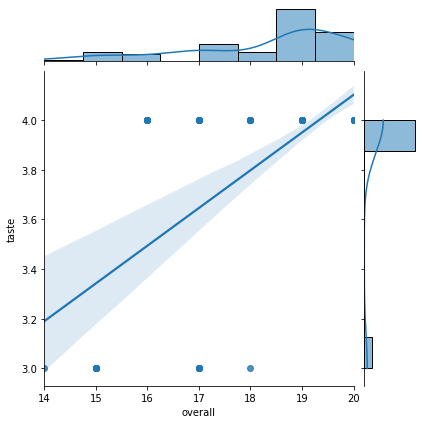

decor
slope is:  0.2301304486159721


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


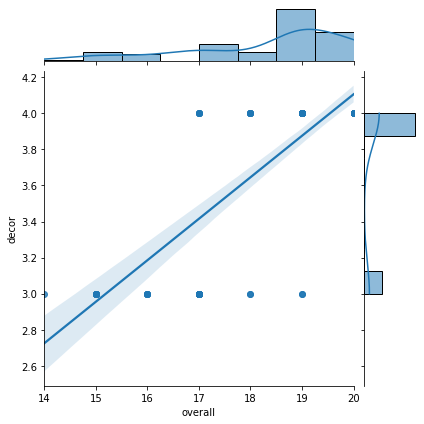

service
slope is:  0.25828825962456264


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


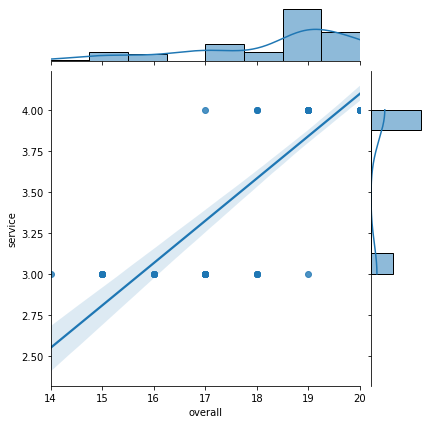

hygiene
slope is:  0.17063315303849838


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


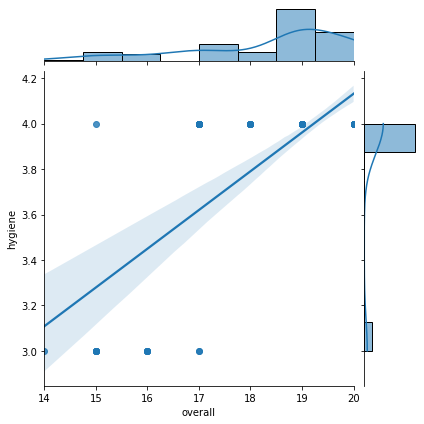

value
slope is:  0.18892777601018157


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


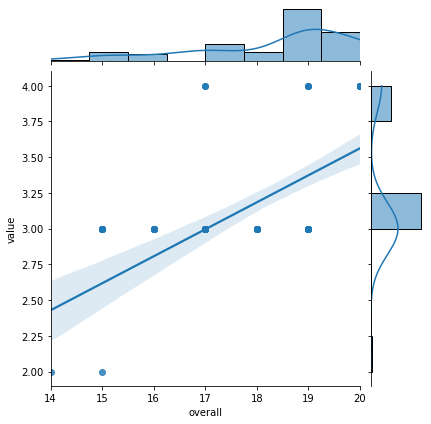

In [70]:
for i in ['taste', 'decor', 'service',  'hygiene', 'value']: #num_facility
    print(i)
    m, b = np.polyfit(df['overall'], df[i], 1)
    print("slope is: ", m)
    scatter_bar("overall",i,df)


taste


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


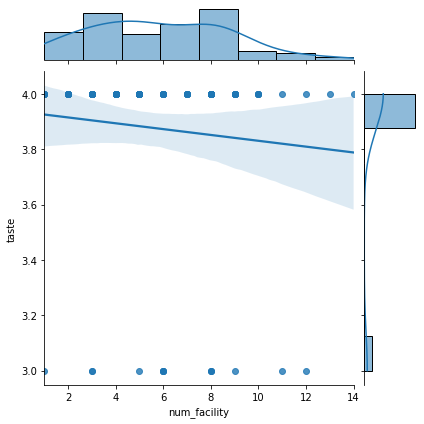

decor


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


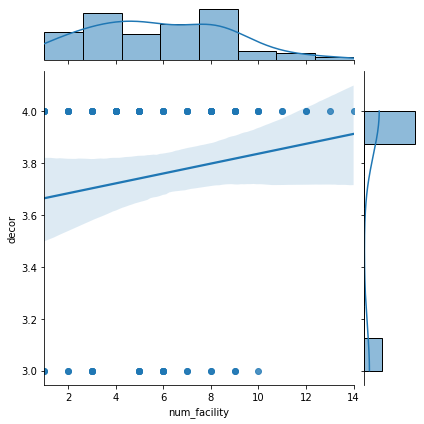

service


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


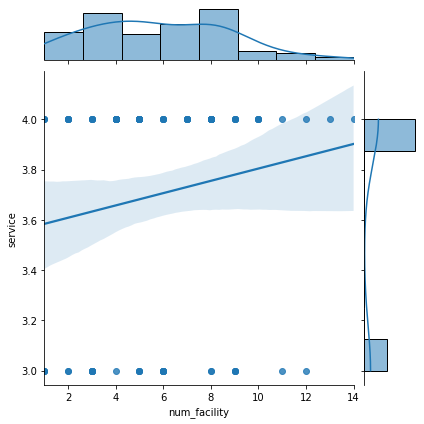

hygiene


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


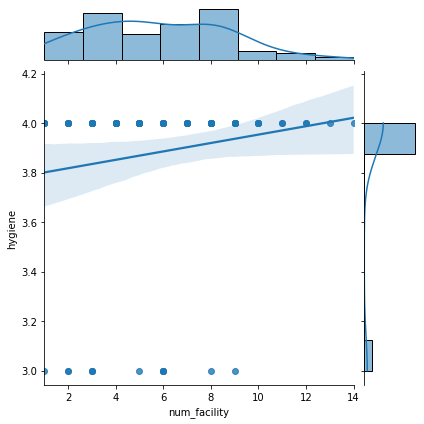

value


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


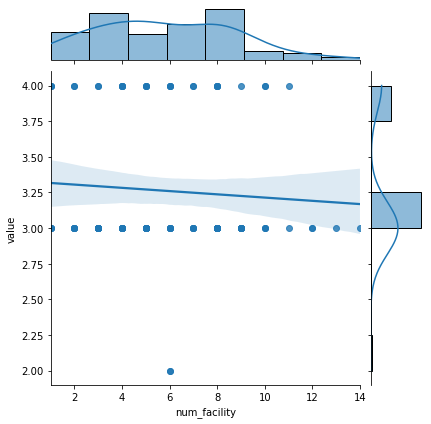

overall


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


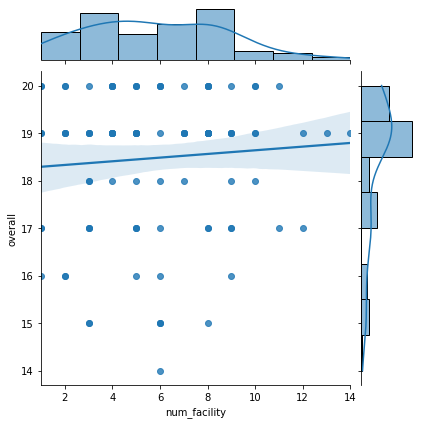

In [65]:
for i in ['taste', 'decor', 'service',  'hygiene', 'value','overall']: #num_facility
    print(i)

    scatter_bar("num_facility",i,df)


In [77]:
df.columns

Index(['name', 'price', 'food_type', 'location', 'bookmark', 'happy', 'sad',
       'num_branch', 'num_seat', 'taste', 'decor', 'service', 'hygiene',
       'value', 'overall', 'price_int', 'food_int', 'location_int',
       'happy_vs_sad', 'num_payment', 'num_facility', 'Alipay', 'AlipayHK',
       'Cash', 'Master', 'UnionPay', 'Visa'],
      dtype='object')

In [79]:
df.loc[:,['taste', 'decor', 'service',  'hygiene','value','overall','happy','sad','bookmark']].corr()

,taste,decor,service,hygiene,value,overall,happy,sad,bookmark
taste,1.000000,0.335976,0.489227,0.420792,0.324379,0.670430,0.137468,-0.327155,0.032874
decor,0.335976,1.000000,0.668779,0.677795,0.243355,0.798594,-0.204869,-0.546399,-0.285625
service,0.489227,0.668779,1.000000,0.597022,0.330463,0.847975,-0.113701,-0.520557,-0.280944
hygiene,0.420792,0.677795,0.597022,1.000000,0.168410,0.752515,-0.199764,-0.498711,-0.201409
value,0.324379,0.243355,0.330463,0.168410,1.000000,0.598299,0.022583,-0.363600,-0.282978
overall,0.670430,0.798594,0.847975,0.752515,0.598299,1.000000,-0.100664,-0.618095,-0.295455
happy,0.137468,-0.204869,-0.113701,-0.199764,0.022583,-0.100664,1.000000,0.535698,0.611806
sad,-0.327155,-0.546399,-0.520557,-0.498711,-0.363600,-0.618095,0.535698,1.000000,0.548583
bookmark,0.032874,-0.285625,-0.280944,-0.201409,-0.282978,-0.295455,0.611806,0.548583,1.000000


taste
slope:  0.15202036271078603


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


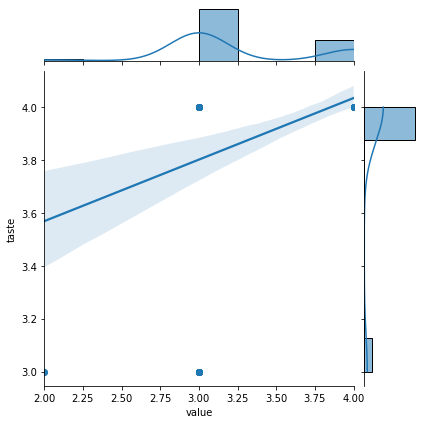

decor
slope:  0.2301304486159721


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


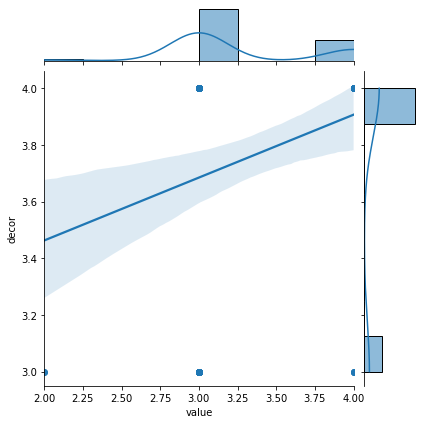

service
slope:  0.25828825962456264


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


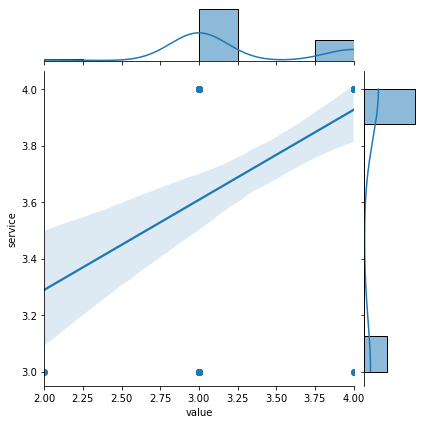

hygiene
slope:  0.17063315303849838


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


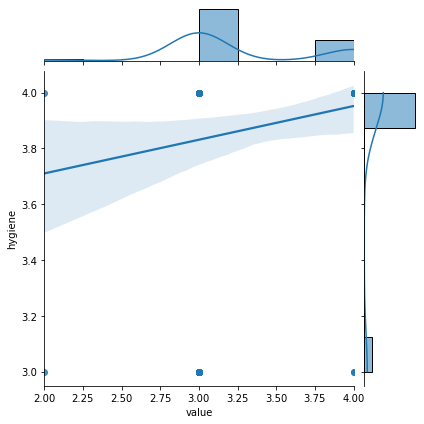

overall
slope:  1.0000000000000002


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


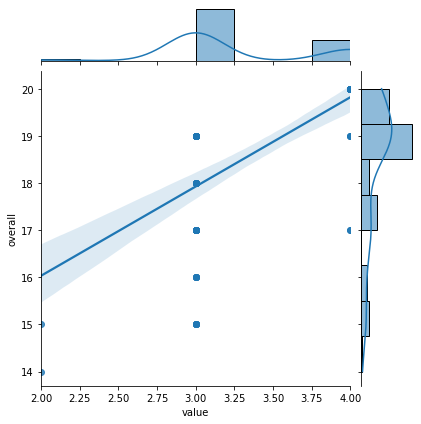

In [66]:
for i in ['taste', 'decor', 'service',  'hygiene','overall']:
    print(i)
    m, b = np.polyfit(df['overall'], df[i], 1)
    print("slope: ",m)
    scatter_bar("value",i,df)

overall


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


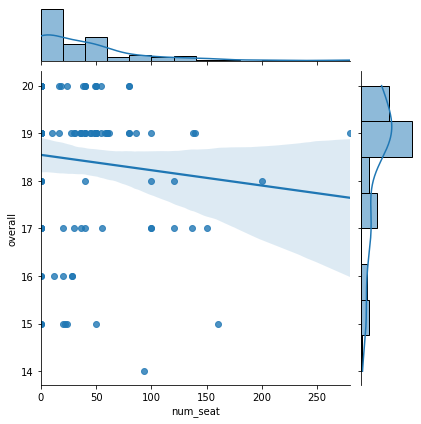

taste


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


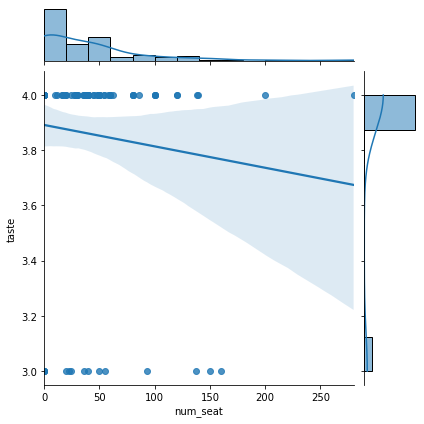

decor


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


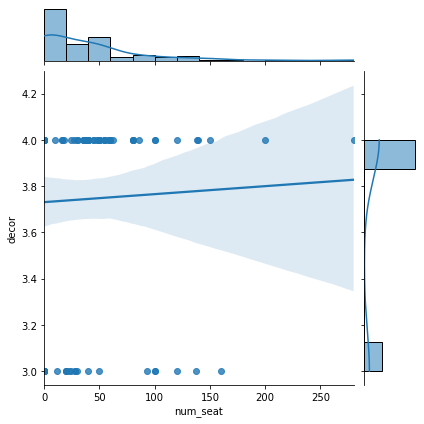

service


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


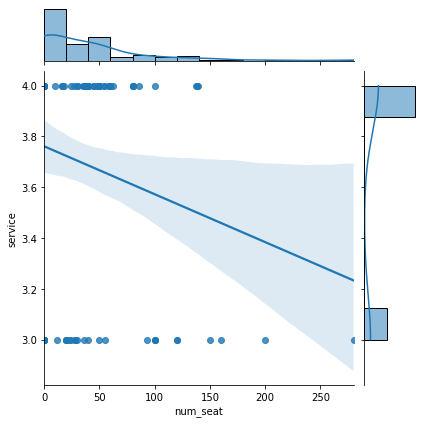

hygiene


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


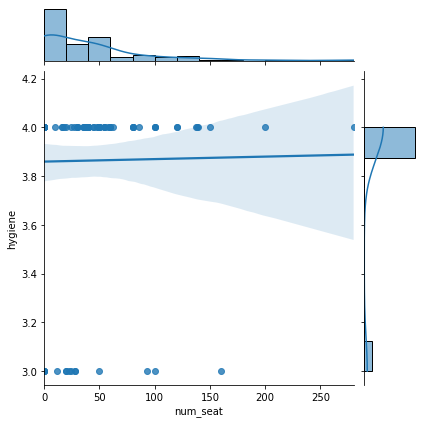

value


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


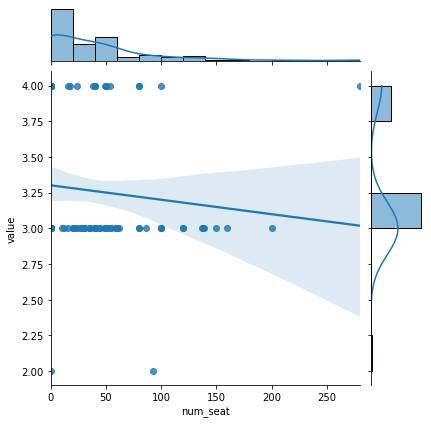

In [67]:
for i in ['overall','taste', 'decor', 'service',  'hygiene', 'value']:
    print(i)


    scatter_bar("num_seat",i,df[df['location']=="HK"]
               )

In [ ]:
for i in Places:
    print(i)
    scatter_bar("price_int","value",df[df['location']==i])

In [ ]:
sns.jointplot(
    data=df[df['location']=="Central"],
    x="overall", y="happy", hue="location_int",
    kind="kde"
)

In [ ]:
df.iloc[:,11:17]

In [ ]:
df

In [ ]:
sns.catplot(x="location_int", y="overall", hue="price_int", kind="box", data=df)

In [ ]:
for i in Places:
    print(i)
    pair_plot(df[df['location']==i],"price")


In [ ]:
#df['food_type'].unique()

In [ ]:
#top 200 restaurants ranked by happy
top_200 = df.sort_values('happy',ascending=False).iloc[0:200]
print("For top 200 restaurants: \n ------------------")
find_average(top_200)

In [ ]:
for i in Places:
    print("For {} \n------------------".format(i))
    find_average(df[df['location']==i])

In [ ]:
#Top 100 restaurant based on happy/sad ratio, group by prices
for i in Places:
    bar_chart(df[df['location']==i].sort_values("happy_vs_sad",ascending=False).iloc[0:100]['price'], "Price","{}: Graph of distirbution top 100 restaurants' prices based on ratio of happiness VS sadness".format(i), "Number of restaurants")

In [ ]:
#Group restaurants based on region and prices

for i in Places:
    bar_chart(df[df['location']==i]['price'], "Price","{}: Graph of distirbution of prices of restaurants".format(i), "Number of restaurants")

In [ ]:
#find average price in HK
for i in Places:
    print("Average price of a meal in {}:".format(i),df[df['location']==i]['price_int'].mean())

In [ ]:
#find average price of meal in area
for i in Places:
    lowest = 10000000
    highest = 0
    restaurant_low = "error"
    restaurant_high = "error"
    for k in restaurant_type:
        mean_price = df.loc[(df['food_type']==k) & (df['location']==i)]['price_int'].mean()
        if mean_price < lowest:
            restaurant_low = k
            lowest = mean_price
        if mean_price > highest:
            restaurant_high = k
            highest = mean_price
        print("Average price of a {} meal in {}:".format(k,i),mean_price)
    print("-------------------------")
    print("Cheapest food is: {} meal, costing {}".format(restaurant_low, lowest))
    print("Most expensive food is: {} meal, costing {}".format(restaurant_high, highest))
    print("-------------------------")
    print("")

In [ ]:
#Find relationship of bookmarks VS happy
for i in Places:
    scatter_graph(df.loc[(df['location']==i)]['bookmark'],df.loc[(df['location']==i)]['happy'],"Relationship between bookmark and happy in {}".format(i))

In [ ]:
visual = pd.plotting.scatter_matrix(df[['bookmark','happy','sad','price_int','happy_vs_sad']],c=df['food_int'],marker = 'o', s=5, hist_kwds={'bins':15}, figsize=(10,10))


In [ ]:
#maps color to legend
base_tags = pd.DataFrame({0,1,2,3,4,5,6,7,8,9})
#model.inverse_transform(base_tags)

plt.imshow([np.unique(df['food_int'])])
plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
#_ = plt.xticks(ticks=np.unique(df['food']),labels=model.inverse_transform(base_tags))